## The Sparks Foundation - GRIP - Data Science and Business Analytics - DEC'2021
## TASK 1 : Prediction using supervised ML
### Author: Annine Duclaire Kenne
Dataset: http://bit.ly/w-data

### Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Importing required Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
%matplotlib inline

### Load the Data

In [2]:
url = 'http://bit.ly/w-data'
data = pd.read_csv(url)

In [3]:
# print out the first five rows
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# Print the last five rws of the data
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


### Exploratory Data Analysis
Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data.

In [5]:
# Check the shape of the data
data.shape

(25, 2)

The data contains 25 rows and 2 columns.

In [6]:
# check columns variables
data.keys()

Index(['Hours', 'Scores'], dtype='object')

In [7]:
# # check the data types of the features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
# From above, the Scores column assumes a categorical type of data. The column is now converted to numeric data type
data['Scores'] = data['Scores'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     float64
dtypes: float64(2)
memory usage: 528.0 bytes


In [9]:
# Find missing values
missed_value = data.isnull().sum().sum()
print(f'The total number of missing values is: {missed_value}')

The total number of missing values is: 0


There is not missing values on the data.

In [10]:
# Statistics describe
data.describe(include='all').T   # T stand for transpose

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


Theis table give us the count, mean, standard deviation, minimum, maximum, first quartile, median and 3rd quartile of each column variable of the data.

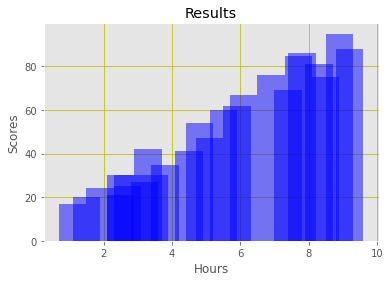

In [11]:
# Plotting the distribution of score with bar chart
style.use('ggplot')
plt.bar(data.Hours, data.Scores, color='blue', alpha=0.5)
plt.title('Results')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.grid(True, color='y')
plt.show()

We can see that the score increase with the hour.

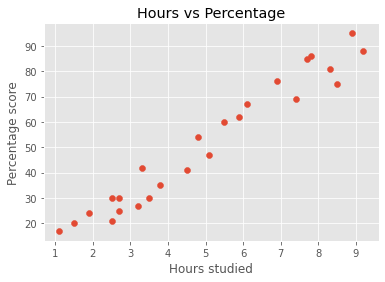

In [12]:
# Plotting the distribution of score with scatter plot
plt.scatter(x='Hours', y='Scores', data=data)
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage score')
plt.show()

From the graph above, we can clearly see that there is a **positive linear relation** between the number of hours studied and percentage of score.

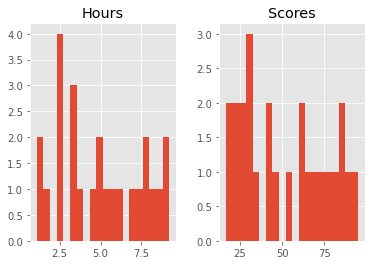

In [ ]:
# Histogram
data.hist(bins=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


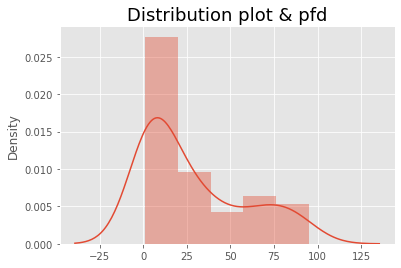

In [ ]:
# Distribution plot with Probability density function(pdf)
sns.distplot(data)
plt.title('Distribution plot & pfd', fontsize=18)
plt.show()

## Prepare data for ML model


### Separate the feature vectors from target 
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [13]:
X = data.Hours.values
y = data.Scores.values

### Split the data into testing set and training set

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Check the shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20,)
(5,)
(20,)
(5,)


In [16]:
# reshaping
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
print(X_train.shape)
print(X_test.shape)

(20, 1)
(5, 1)


### Training the Algorithm
Alfter splitting our data into training and testing sets, now is finally the time to train our algorithm.

In [17]:
# Create the model
regressor = LinearRegression()
# Fit the model
regressor.fit(X_train, y_train)
# Make prediction
y_pred = regressor.predict(X_test)

In [18]:
print(f'score:{ regressor.score(X_train, y_train)*100:.3f}%')
print('coefficients: ',regressor.coef_)
print('Intercept: ', regressor.intercept_)

score:94.912%
coefficients:  [9.68207815]
Intercept:  2.826892353899737


### Model evaluation
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. 

In [19]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'The r2 score is:{r2 : .2f}')
print(f'The meam absolute error is:{mae:.2f}')
print(f'The mean squared error is:{mse:.2f}')
print(f'The mean absolute percentage error is:{mape:.2f}')

The r2 score is: 0.97
The meam absolute error is:3.92
The mean squared error is:18.94
The mean absolute percentage error is:0.11


We get a score of 0.96 that means **96%**.

### Visualization of the results

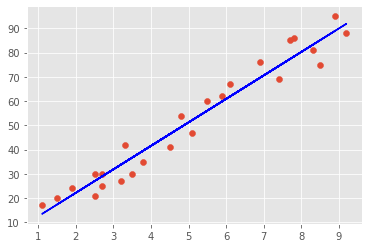

In [21]:
# Plotting the Regression line
line = regressor.coef_ * X + regressor.intercept_

plt.scatter(X, y)
plt.plot(X, line, 'blue')
plt.show()


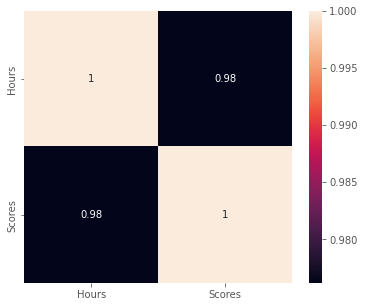

In [23]:
# Correlation matrix
corr = data.corr()
# figure
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True)  # annot = True to print the values inside the square
plt.show()

### Observation vs prediction plot
In this part, we shows a simplest way to compare the predicted output vs. the actual output. 
A good model will have most of the scatter dots near the diagonal black line.

In [ ]:
# Store the actual and the predicted value into a dataframe
df = pd.DataFrame({'Actual':y_test, 'Predictde':y_pred})
df.head()

,Actual,Predictde
0,81.0,83.188141
1,30.0,27.032088
2,21.0,27.032088
3,76.0,69.633232
4,62.0,59.951153


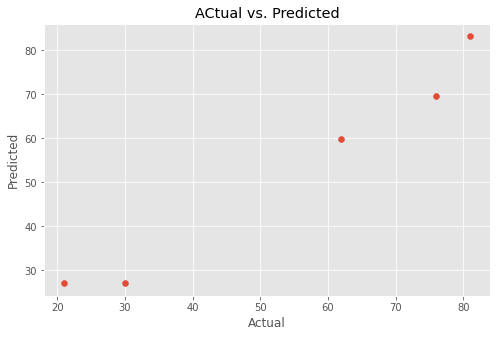

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred)
plt.title('ACtual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

### Residual plot

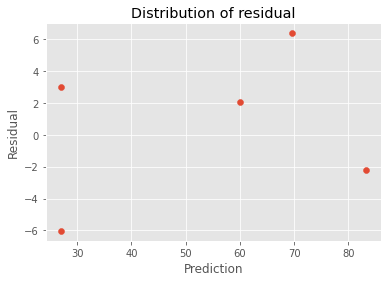

In [ ]:
residual = y_test - y_pred
plt.scatter(y_pred, residual)
plt.title('Distribution of residual')
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.show()

We notice in these plots that the values are randomly dispersed around the horizontal axis. So, the Linear Regression model is appropriated to the data.

### Test our model with our own data

In [ ]:
Hours = np.array(9.25).reshape(-1,1)
own_pred = regressor.predict(Hours)
print(f'No of Hours = {Hours}')
print(f'Predicted score = {own_pred[0]}')

No of Hours = [[9.25]]
Predicted score = 92.38611528261494


### Conclusion:
We have successfully predicted the percentage of a student based on the no. of study hours.